In [25]:
import random as r
import matplotlib.pyplot as plt

r.seed(42)

points = [(r.randint(-100, 100), r.randint(-100, 100)) for i in range(16)]
points.sort()
labels = [-1]*8 + [1]*8
print(points)

[(-94, 89), (-92, -93), (-77, -45), (-43, -65), (-41, 29), (-30, -38), (7, -44), (39, -78), (43, -50), (51, 8), (54, -94), (63, -72), (73, 89), (79, 39), (83, 66), (88, -74)]


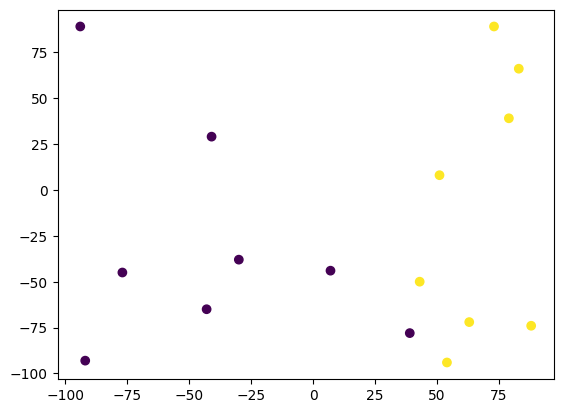

In [26]:
fig, ax = plt.subplots()

ax.scatter([p[0] for p in points], [p[1] for p in points], c=labels)

In [27]:
import mip

labels = [-1]*8 + [1]*8


model = mip.Model()

# Variables
w = [model.add_var(var_type=mip.CONTINUOUS) for _ in range(2)]  # Weights
b = model.add_var(var_type=mip.CONTINUOUS)  # Bias
beta_ = [model.add_var(var_type=mip.CONTINUOUS) for _ in range(2)]  # Weights


# Adding constraints for linear separability
for point, label in zip(points, labels):
    model += (mip.xsum(w[i] * point[i] for i in range(2)) + b)*label >= 1

model += beta_[0] >= w[0]
model += beta_[0] >= -w[0]
model += beta_[1] >= w[1]
model += beta_[1] >= -w[1]


# Placeholder Objective: Minimize bias to ensure a solution is found that separates the points
model.objective = mip.minimize(mip.xsum(beta_[i] for i in range(2)))

model.optimize()

# Extracting model parameters
w_opt = [w[i].x for i in range(2)]
b_opt = b.x

print(f"Optimal w: {w_opt}")
print(f"Optimal b: {b_opt}")

# Displaying the equation of the hyperplane
print(f"The equation of the separating hyperplane is: {w_opt[0]}*x + {w_opt[1]}*y + {b_opt} = 0")



Optimal w: [0.3150183150183153, 0.17032967032967047]
Optimal b: 0.0
The equation of the separating hyperplane is: 0.3150183150183153*x + 0.17032967032967047*y + 0.0 = 0


In [28]:
#store results in a dict 
hyperplane = {"Model": [], "w":[], "b": []}

hyperplane["Model"].append("No Loss function")
hyperplane["w"].append(w_opt)
hyperplane["b"].append(b_opt)


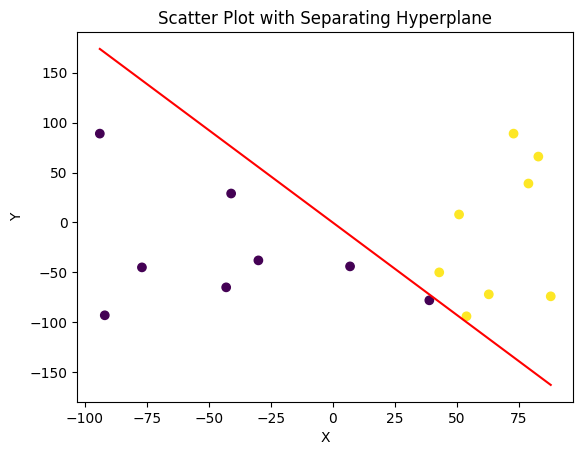

In [29]:
plt.scatter([p[0] for p in points], [p[1] for p in points], c=labels)

# Determine the range of x values
x_min = min([p[0] for p in points])
x_max = max([p[0] for p in points])

# Check if w_opt[1] is zero to avoid division by zero
if hyperplane["w"][0][1] == 0:
    # Plot vertical line if w_opt[1] is zero
    x_line = -hyperplane["b"][0] / hyperplane["w"][0][0]
    plt.axvline(x=x_line, color='r')
else:
    # Calculate y values for the hyperplane across the x range
    x_values = [x_min, x_max]
    y_values = [(-hyperplane["b"][0] - hyperplane["w"][0][0] * x) / hyperplane["w"][0][1] for x in x_values]
    plt.plot(x_values, y_values, 'r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Separating Hyperplane')
plt.show()




In [30]:
#flip the sign of 4 points
labels[4] = 1
labels[6] = 1
labels[9] = -1
labels[10] = -1

In [31]:
#Hinge loss
model = mip.Model()
  
C = 1 

# Variables
w = [model.add_var(var_type=mip.CONTINUOUS) for _ in range(2)]  # Weights
b = model.add_var(var_type=mip.CONTINUOUS)  # Bias
beta_ = [model.add_var(var_type=mip.CONTINUOUS) for _ in range(2)]  # Weights
errors = [model.add_var(var_type=mip.CONTINUOUS) for _ in range(len(points))]  # errors

# Adding constraints for linear separability
for point, label, e in zip(points, labels, errors):
    model += (mip.xsum(w[i] * point[i] for i in range(2)) + b)*label >= 1 - e

model += beta_[0] >= w[0]
model += beta_[0] >= -w[0]
model += beta_[1] >= w[1]
model += beta_[1] >= -w[1]


# Placeholder Objective: Minimize bias to ensure a solution is found that separates the points
model.objective = mip.minimize(mip.xsum(beta_[i] for i in range(2))) + C *  mip.xsum(errors[i] for i in range(len(points)))

model.optimize()

# Extracting model parameters
w_opt = [w[i].x for i in range(2)]
b_opt = b.x

print(f"Optimal w: {w_opt}")
print(f"Optimal b: {b_opt}")

# Displaying the equation of the hyperplane
print(f"The equation of the separating hyperplane is: {w_opt[0]}*x + {w_opt[1]}*y + {b_opt} = 0")

hyperplane["Model"].append("Hinge Loss")
hyperplane["w"].append(w_opt)
hyperplane["b"].append(b_opt)

Optimal w: [0.020346042934956746, 0.010253123998718357]
Optimal b: 0.0
The equation of the separating hyperplane is: 0.020346042934956746*x + 0.010253123998718357*y + 0.0 = 0


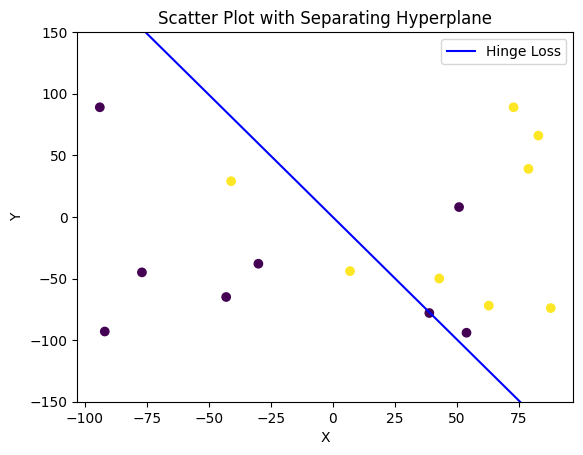

In [32]:
plt.scatter([p[0] for p in points], [p[1] for p in points], c=labels)

# Determine the range of x values
x_min = min([p[0] for p in points])
x_max = max([p[0] for p in points])

# Check if w_opt[1] is zero to avoid division by zero
if hyperplane["w"][0][1] == 0:
    # Plot vertical line if w_opt[1] is zero
    # #no loss function
    # x_line_noloss = -hyperplane["b"][0] / hyperplane["w"][0][0]
    # plt.axvline(x=x_line_noloss, color='r')

    #hinge loss
    x_line_hinge = -hyperplane["b"][1] / hyperplane["w"][1][0]
    plt.axvline(x=x_line_hinge, color='b')
else:
    # Calculate y values for the hyperplane across the x range
    x_values = [x_min, x_max]
    # #no loss
    # y_values_noloss = [(-hyperplane["b"][0] - hyperplane["w"][0][0] * x) / hyperplane["w"][0][1] for x in x_values]
    # plt.plot(x_values, y_values_noloss, 'r')
    #hinge loss
    y_values_hing = [(-hyperplane["b"][1] - hyperplane["w"][1][0] * x) / hyperplane["w"][1][1] for x in x_values]
    plt.plot(x_values, y_values_hing, 'b', label="Hinge Loss")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Separating Hyperplane')
plt.ylim(-150, 150)
plt.legend()
plt.show()